In [1]:
library(tidyverse)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Descriptive statistic

### 1.

In [2]:
options(repr.plot.width = 5, repr.plot.height = 3)

data = c(1.2, 1.9, 1.7, 1.1, 1.2, 1.4, 0.9, 2.2, 2, 1.7, 1.8,
1.3, 1.5, 2.7, 1, 1.5, 1.2, 1.3, 0.6, 1.4, 2.1, 1.9)
table(data)

data
0.6 0.9   1 1.1 1.2 1.3 1.4 1.5 1.7 1.8 1.9   2 2.1 2.2 2.7 
  1   1   1   1   3   2   2   2   2   1   2   1   1   1   1 

### 2

In [3]:
table(data)/length(data)

data
       0.6        0.9          1        1.1        1.2        1.3        1.4 
0.04545455 0.04545455 0.04545455 0.04545455 0.13636364 0.09090909 0.09090909 
       1.5        1.7        1.8        1.9          2        2.1        2.2 
0.09090909 0.09090909 0.04545455 0.09090909 0.04545455 0.04545455 0.04545455 
       2.7 
0.04545455 

### 3

$\mu \approx 1.527$  
$\sigma \approx 0.486$  
$\sigma^2 \approx 0.2363$  

### 4

About $72.7 \%$ of the data lies within one standard diviation of the mean 

### 5

In [4]:
df = read.csv('gas-prices', header = FALSE, col.names = c('time', 'price'))
head(df)

time,price
960177600,1.583
960782400,1.607
961387200,1.653
961992000,1.664
962596800,1.684
963201600,1.677


#### 5.1

In [5]:
table(df$price)


1.121 1.122 1.143 1.146 1.158 1.162 1.171 1.173 1.175 1.176  1.18 1.185 1.191 
    1     1     1     1     1     1     1     2     1     1     1     1     1 
1.217 1.221 1.238 1.281 1.298 1.301 1.324 1.345 1.353 1.385 1.394 1.417 1.428 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
1.433 1.434 1.436 1.441 1.447 1.448 1.449  1.45 1.451 1.455 1.456  1.46 1.461 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
1.463 1.466 1.469  1.47 1.471 1.472 1.473 1.475 1.476 1.477  1.48 1.487  1.49 
    1     6     2     1     1     1     1     1     1     1     1     1     2 
1.492 1.493 1.494 1.495 1.496   1.5 1.502 1.507 1.508 1.511 1.517 1.518 1.519 
    1     1     1     1     2     2     2     1     1     1     1     1     1 
1.521 1.522 1.523 1.524 1.525 1.526 1.527 1.529  1.53 1.531 1.532 1.533 1.534 
    1     1     1     2     1     1     1     1     2     1     1     2     2 
1.535 1.536 1.538 1.542 1.544 1.555 1.556 1.557 1.5

In [6]:
table(df$price)/length(df$price)


      1.121       1.122       1.143       1.146       1.158       1.162 
0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 
      1.171       1.173       1.175       1.176        1.18       1.185 
0.001335113 0.002670227 0.001335113 0.001335113 0.001335113 0.001335113 
      1.191       1.217       1.221       1.238       1.281       1.298 
0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 
      1.301       1.324       1.345       1.353       1.385       1.394 
0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 
      1.417       1.428       1.433       1.434       1.436       1.441 
0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 
      1.447       1.448       1.449        1.45       1.451       1.455 
0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 0.001335113 
      1.456        1.46       1.461       1.463       1.466       1.469 
0.001335113 0.001335113 0.001335113 0.001335113 0.

In [7]:
cat('mu =', mean(df$price), 'sigma =', sd(df$price), 'sigma² =', var(df$price))

mu = 2.677702 sigma = 0.8926482 sigma² = 0.7968209

In [8]:
filter(df, price >= mean(df$price)-sd(df$price) & price <= mean(df$price)+sd(df$price)) %>% summarise(portion = n() / length(df$price))

portion
0.4793057


# 2 Binomial Distribution

In [9]:
dbinom(x=8, size=20, prob=0.25)

[1] 0.06088669

$$\binom{20}{8}0.25^8(1-0.25)^{20-8}\approx 0.06089$$

# 3 Probability distribution

## 3.1 Discrete distribution

### 1
$p(2)=\frac{1}{36}$  
$p(3)=\frac{2}{36}$  
$p(4)=\frac{3}{36}$  
$p(5)=\frac{4}{36}$  
$p(6)=\frac{5}{36}$  
$p(7)=\frac{6}{36}$  
$p(8)=\frac{5}{36}$  
$p(9)=\frac{4}{36}$  
$p(10)=\frac{3}{36}$  
$p(11)=\frac{2}{36}$  
$p(12)=\frac{1}{36}$  

### 2
$P(X>=8)=p(8)+p(9)+p(10)+p(11)+p(12)=\frac{15}{36}\approx 0.4167$

### 3
$P(Y_k=l)=P(X=k)(1-P(X=k)^{l-1}) \sim$ geometric distribution with $k=l$ and $p=P(X=k)$

### 4

In [10]:
p = expand.grid(dice1 = 1:6, dice2=1:6) %>% mutate(sum = dice1 + dice2) %>% group_by(sum) %>% summarise(freq = n() / 36)

Warning message:
"`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session."

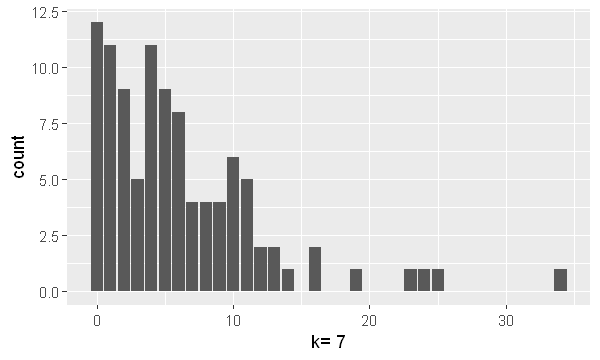

In [11]:
k = sample(2:12, size=1)
xlabel = paste('k=', k)
samp = data_frame(val = rgeom(n = 100, prob = filter(p, sum==k)$freq))
ggplot(samp, aes(val)) + geom_bar() + xlab(xlabel)

## 3.2

### 1
$P\{0.4 <= X <= 7\} = 0.3$

### 2
$P(N=k)=P\{0.2<=X<=0.5\}(1-P\{0.2<=X<=0.5\})^{k-1}=0.3\cdot0.6^k$

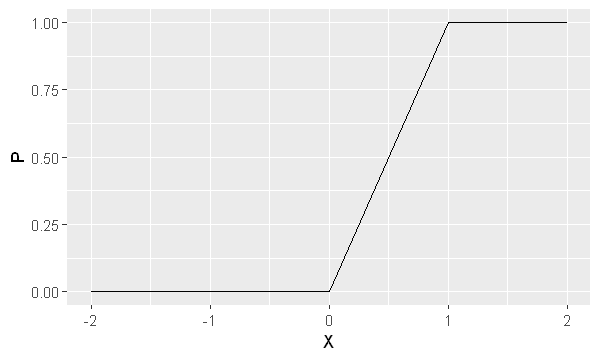

In [12]:
ggplot(data.frame(X = c(-2, 0, 1, 2), P=c(0, 0, 1, 1)), aes(x=X,y=P)) + geom_line()

## 3.3

### 1
(b)

### 2
(a)

$$p=\int_{-1}^1 \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\approx 0.68$$
$P(Y=k)=p(1-p)^{k-1}$

### 4

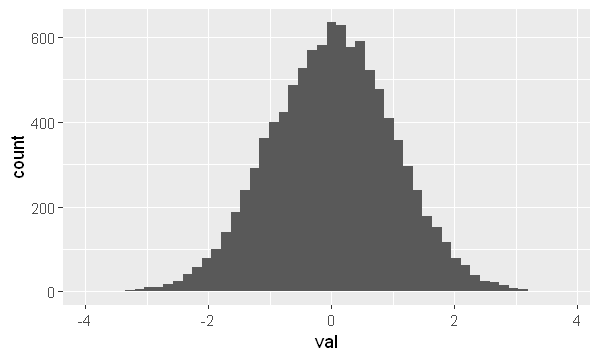

In [13]:
samp = data_frame(val = rnorm(n = 10000))
ggplot(samp, aes(val)) + geom_histogram(bins = 50)

# 4 Hypothesis Testing

## 4.1

### 1
False, we know it's different, but not how different

### 2
True

### 3
True

### 4
False

## 4.2


In [14]:
z = (400-380)/(50/sqrt(200))
2*pnorm(q=z, lower.tail = FALSE)

[1] 1.541726e-08

### 1
Assuming $H_a$: $\mu \neq \mu_0$
$$z_\text{stat}=\frac{\bar{x}-\mu_0}{SE_{\bar{x}}} = \frac{400-380}{\frac{50}{\sqrt{200}}} \approx 5.657 $$
$p \approx 1.542\cdot10^{-8} < 0.05$
We therefore reject $H_0$. It is exceedingly unlikely that water usage levels haven't changed.

### 2
The p=value is defined as $P(T\geq t | H_0)$, $P(T\leq t | H_0)$ for a left-tail p-value or  $2\cdot P(T\geq t | H_0)$ , i.e. the probability that if $H_0$ were true, that the test statistic would be at least as extreme as what was observed.
A low p-value therefore provides strong evidence against $H_0$